### 1. 全连接层

**张量方式实现**

In [1]:
import tensorflow as tf

In [2]:
x = tf.random.normal([2, 32])
w1 = tf.Variable(tf.random.truncated_normal([32, 8]))
b1 = tf.Variable(tf.zeros([8]))
o1 = tf.matmul(x, w1) + b1 # 线性变换
o1 = tf.nn.relu(o1) # 激活函数

In [3]:
o1

<tf.Tensor: id=32, shape=(2, 8), dtype=float32, numpy=
array([[ 0.        ,  0.        ,  1.8496013 ,  2.217009  ,  0.10900241,
         0.        ,  0.        ,  4.453087  ],
       [ 0.        ,  5.5442433 , 14.533345  ,  6.9963984 , 17.607647  ,
         0.        ,  0.        , 13.298783  ]], dtype=float32)>

**层级方式实现**

- `layers.Dense(units, activation)`
    - `units`: 输出节点数
    - `activation`:激活函数

In [13]:
from tensorflow.keras import layers, Sequential

In [5]:
x = tf.random.normal([3, 32])
fc = layers.Dense(4, activation=tf.nn.relu)
h1 = fc(x) # 完成一次全连接层的计算

In [6]:
# fc.kernel # 获取权值矩阵 w
# fc.bias # 获取偏置向量 b
# fc.trainable_variables # 返回待优化参数列表
# fc.variables # 返回所有参数列表 

### 2. 神经网络

**张量方式实现**

In [7]:
x = tf.random.normal([100, 28*28])
# 隐藏层 1 张量
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
# 隐藏层 2 张量
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
# 隐藏层 3 张量
w3 = tf.Variable(tf.random.truncated_normal([128, 64], stddev=0.1))
b3 = tf.Variable(tf.zeros([64]))
# 输出层张量
w4 = tf.Variable(tf.random.truncated_normal([64, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

with tf.GradientTape() as tape: # 梯度记录器
    # 隐藏层 1 向前计算
    h1 = x@w1 + tf.broadcast_to(b1, [x.shape[0], 256])
    h1 = tf.nn.relu(h1)
    # 隐藏层 2 向前计算
    h2 = h1@w2 + b2
    h2 = tf.nn.relu(h2)
    # 隐藏层 3 向前计算
    h3 = h2@w3 + b3
    h3 = tf.nn.relu(h3)
    # 输出层向前计算
    h4 = h3@w4 + b4

**层级方式实现**

In [8]:
fc1 = layers.Dense(256, activation=tf.nn.relu)
fc2 = layers.Dense(128, activation=tf.nn.relu)
fc3 = layers.Dense(64, activation=tf.nn.relu)
fc4 = layers.Dense(10, activation=None) # 输出层

x = tf.random.normal([4, 28*28])
h1 = fc1(x) #  通过隐藏层 1 得到输出 
h2 = fc2(h1) #  通过隐藏层 2 得到输出 
h3 = fc3(h2) #  通过隐藏层 3 得到输出 
h4 = fc4(h3) #  通过输出层 得到输出 

- 也可以通过 `Sequential` 容器封装成一个网络大类对 象
- 调用大类的前向计算函数即可完成所有层的前向计算

In [14]:
model = Sequential([
    layers.Dense(256, activation=tf.nn.relu) , # 创建隐藏层 1     
    layers.Dense(128, activation=tf.nn.relu) , # 创建隐藏层 2     
    layers.Dense(64, activation=tf.nn.relu) , # 创建隐藏层 3     
    layers.Dense(10, activation=None) , # 创建输出层 
])
out = model(x) #  前向计算得到输出 

### 3. 激活函数

**`Sigmoid`**
$$Sigmoid(x) = \frac{1}{1+e^{-1}}$$

In [15]:
import matplotlib.pyplot as plt

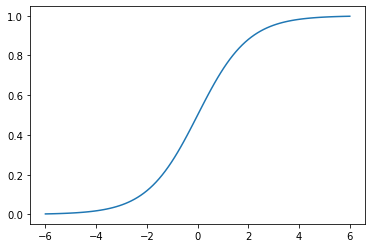

In [20]:
x = tf.linspace(-6., 6., 100)
y = tf.nn.sigmoid(x)
plt.plot(x, y)

**`ReLU`**
$$ReLU = max(0, x)$$

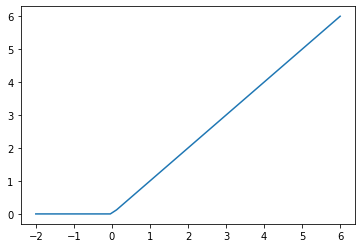

In [19]:
x = tf.linspace(-2., 6., 50)
y = tf.nn.relu(x)
plt.plot(x, y)

**`LeakyReLU`**
![](https://i.postimg.cc/MKD4TKqg/screenshot-20.png)

- 其中`p`为用户设置的某较小值超参数
- 当`p = 0`时，`LeayReLU`函数退化为`ReLU`函数
- 当`p != 0` 时能够获得较小导数`p`，从而避免梯度弥散现象

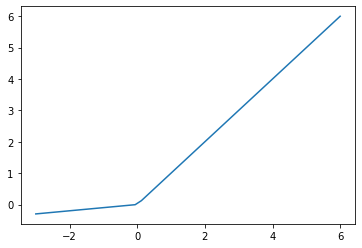

In [21]:
x = tf.linspace(-3., 6., 50)
y = tf.nn.leaky_relu(x, alpha=0.1)
plt.plot(x, y)

**`Tanh`**
$$tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}} = 2\cdot sigmoid(2x)-1$$

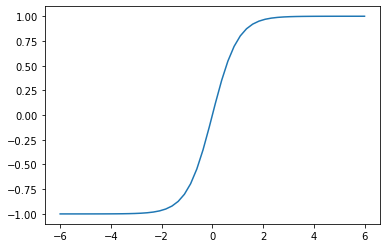

In [22]:
x = tf.linspace(-6., 6., 50)
y = tf.nn.tanh(x)
plt.plot(x, y)

**`Softmax`**
- `tf.nn.softmax`
$$Softmax(x_i) = \frac{e^{z_i}}{\sum_{j=1}^{d_{out}}e^{z_j}}$$

- `Softmax` 函数不仅可以将输出值映射到`[0,1]`区间，还满足所有的输出值之和为 `1`的特性。 

In [26]:
z = tf.constant([2., 1., 0.1])
tf.nn.softmax(z)

<tf.Tensor: id=816, shape=(3,), dtype=float32, numpy=array([0.6590012 , 0.24243298, 0.09856589], dtype=float32)>

- `tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False)，`
![](https://i.postimg.cc/VvBDh4Kd/screenshot-21.png)

In [27]:
z = tf.random.normal([2,10]) # 构造输出层的输出 
y_onehot = tf.constant([1,3]) # 构造真实值 
y_onehot = tf.one_hot(y_onehot, depth=10) # one-hot 编码 
# 输出层未使用 Softmax 函数，故 from_logits 设置为 True 
# 这样 categorical_crossentropy 函数在计算损失函数前，会先内部调用 Softmax 函数 
loss = keras.losses.categorical_crossentropy(y_onehot,z,from_logits=True) 
loss = tf.reduce_mean(loss) # 计算平均交叉熵损失 
loss 

<tf.Tensor: id=862, shape=(), dtype=float32, numpy=2.5169702>

In [28]:
y_onehot

<tf.Tensor: id=827, shape=(2, 10), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

### 4. 误差计算

**均方误差（MSE）**
- `keras.losses.MSE`
$$MSE(y, o) = \frac{1}{d_{out}}\sum_{i=1}^{d_{out}}(y_i-o_i)^2$$

In [29]:
o = tf.random.normal([2, 10])
y_onehot = tf.constant([1, 3])
y_onehot = tf.one_hot(y_onehot, depth=10)
loss = keras.losses.MSE(y_onehot, o)
loss

<tf.Tensor: id=876, shape=(2,), dtype=float32, numpy=array([1.1292433, 1.803258 ], dtype=float32)>

In [31]:
# MSE 函数返回的是每个样本的均方差，需要在样本维度上再次平均来获 得平均样本的均方差，
loss = tf.reduce_mean(loss)
loss

<tf.Tensor: id=880, shape=(), dtype=float32, numpy=1.4662507>

In [32]:
# 也可以通过层方式实现，对应的类为 keras.losses.MeanSquaredError()
# 和其他层的类一 样，调用__call__函数即可完成前向计算
criteon = keras.losses.MeanSquaredError() # 创建 MSE 类
loss = criteon(y_onehot,o) # 计算 batch 均方差 
loss 

<tf.Tensor: id=900, shape=(), dtype=float32, numpy=1.4662507>

**交叉熵误差**
- 某个分布`P(i)`的熵定义为：
- ` tf.math.log `
$$H(P) = -\sum_iP(i)\log_xP(i)$$

**交叉熵(Cross Entropy)**
- 交叉熵可以很好地衡量 2 个分布之间的**“距离”**
![](https://i.postimg.cc/TwXbsbhs/screenshot-22.png)
![](https://i.postimg.cc/J0pBtdKw/screenshot-23.png)